# Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import missingno as ms
from tqdm import tqdm
from deep_translator import GoogleTranslator
warnings.filterwarnings('ignore')
%reload_ext watermark
%watermark -a "Guilherme Silva"


Author: Guilherme Silva



# Funções Utlitárias

In [2]:
def ausencia_total(dataframe):

    '''
    Gera o % de valores ausentes para todo o DaraFrame

    Parâmetros:
    ----------
    dataframe : pandas.DataFrame
        DataFrame que será analisado quanto à presença de valores nulos.

    Retorna:
    -------
    print: Quantidade de valores ausentes do DataFrame:
    
    '''
    
    total_celulas = np.prod(dataframe.shape)

    contagem_ausentes = dataframe.isnull().sum().sum()

    print(f"O dataset possui", round(((contagem_ausentes/total_celulas) * 100),2), "% De valores ausentes.")

def verifica_ausentes(dataframe):
    '''
    Gera um DataFrame com a contagem e a porcentagem de valores ausentes (NaN) para cada coluna.

    Parâmetros:
    ----------
    dataframe : pandas.DataFrame
        DataFrame que será analisado quanto à presença de valores nulos.

    Retorna:
    -------
    pandas.DataFrame
        DataFrame com duas colunas:
            - 'Qtd': quantidade de valores ausentes por coluna
            - '%': porcentagem de valores ausentes em relação ao total de linhas
    '''
    colunas = {0: 'Qtd'}
    ausentes = pd.DataFrame(dataframe.isna().sum())
    ausentes['%'] = round(dataframe.isna().sum() / dataframe.shape[0] * 100, 2)
    ausentes.rename(columns=colunas, inplace=True)
    ausentes.index.name = 'Colunas'
    return ausentes.sort_values('%',ascending=False)


# Verificando o ambiente de trabalho e versões dos pacotes

In [3]:
%watermark

Last updated: 2025-08-04T20:45:08.041830-03:00

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 9.4.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 126 Stepping 5, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [4]:
%watermark --iversions

deep_translator: 1.11.4
numpy          : 2.3.2
matplotlib     : 3.10.3
pandas         : 2.3.1
missingno      : 0.5.2
tqdm           : 4.67.1
seaborn        : 0.13.2



In [5]:
# Para não trucar a largura das colunas
pd.set_option('display.max_colwidth', 300)


In [6]:
# Para mostrar todas as colunas
pd.set_option('display.max_columns',100)

# Carregando o Dataset principal e o dicionário de dados

In [97]:
# Lista para mapear os valores ausentes
lista_ausentes = ["n/a","na","underfined"]

In [98]:
# Dataset principal
df = pd.read_csv('dataset.csv',na_values=lista_ausentes)

In [99]:
# Dicionário de dados
dicionario = pd.read_excel('dicionario.xlsx')

# Análise Explorátoria dos dados

In [10]:
# Primeiras 5 linhas do dataset principal
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [11]:
# Verificando a estrutura dos dados
df.shape

(150001, 55)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

<Axes: >

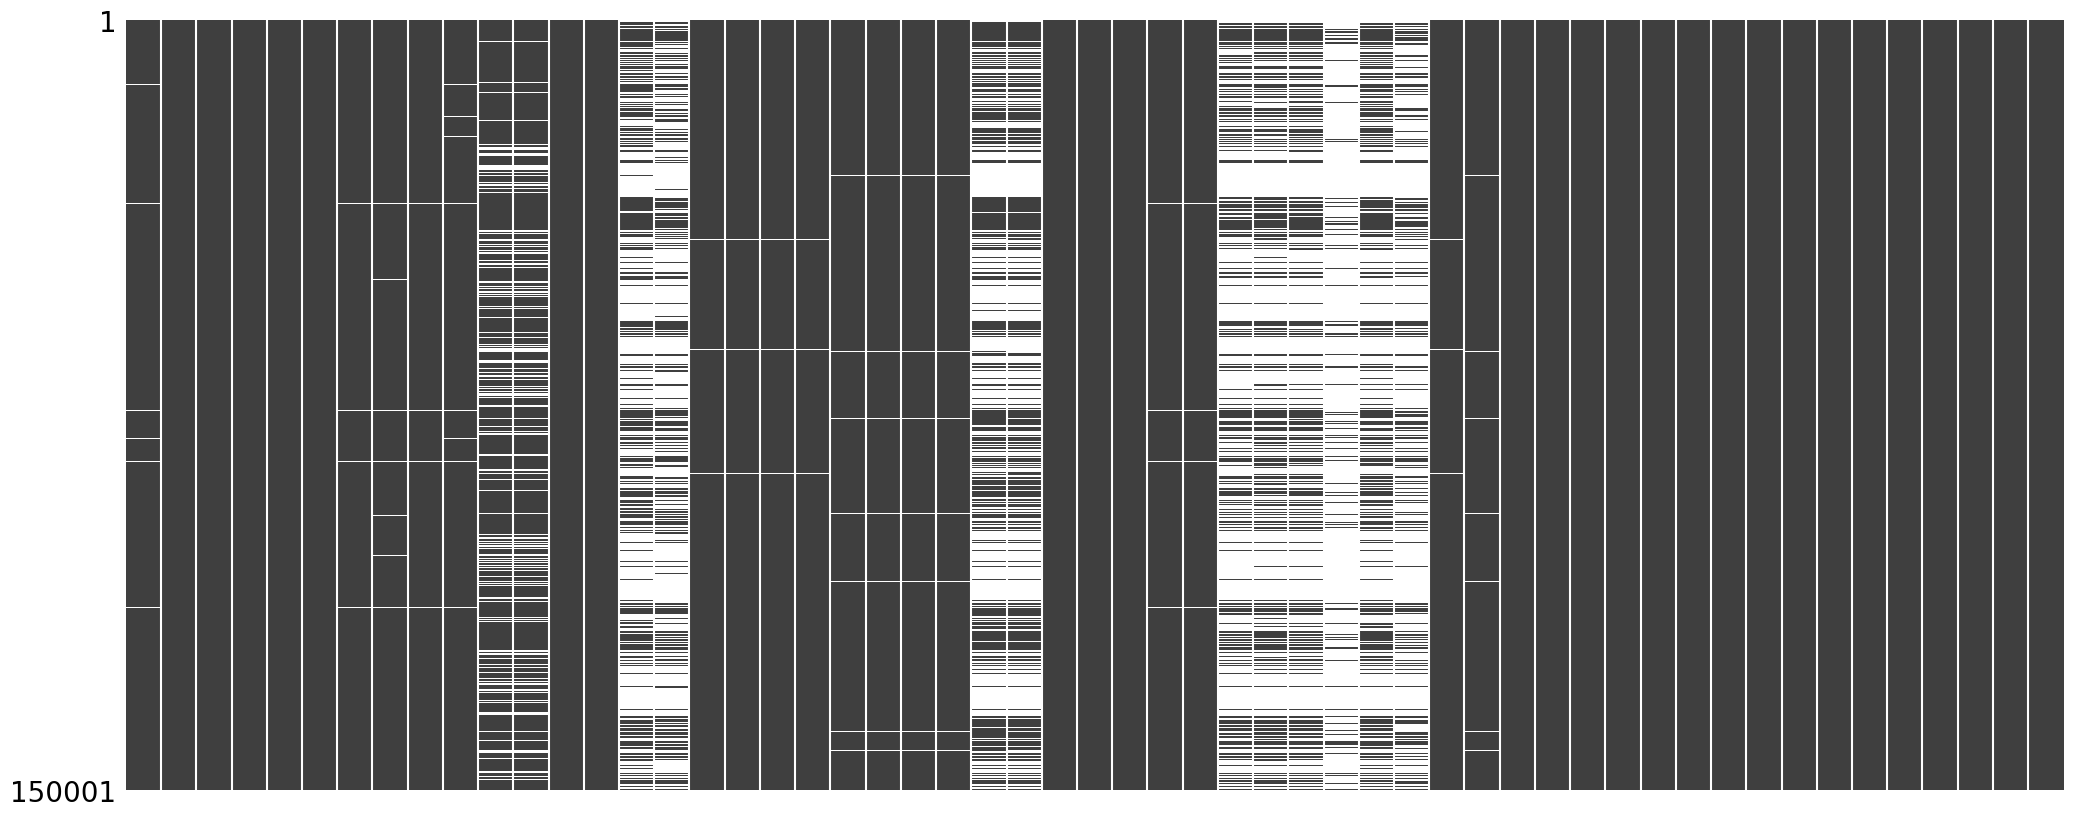

In [13]:
# Verificando a ditribuição dos valores ausentes por coluna
%matplotlib inline
ms.matrix(df,sparkline=False, label_rotation=45)

In [14]:
# %De valores ausentes por coluna Do dataset principal
ausencia_total(df)
verifica_ausentes(df)

O dataset possui 12.5 % De valores ausentes.


,Qtd,%
Colunas,,
Nb of sec with 37500B < Vol UL,130254,86.84
Nb of sec with 6250B < Vol UL < 37500B,111843,74.56
Nb of sec with 125000B < Vol DL,97538,65.02
TCP UL Retrans. Vol (Bytes),96649,64.43
Nb of sec with 31250B < Vol DL < 125000B,93586,62.39
Nb of sec with 1250B < Vol UL < 6250B,92894,61.93
Nb of sec with 6250B < Vol DL < 31250B,88317,58.88
TCP DL Retrans. Vol (Bytes),88146,58.76
HTTP UL (Bytes),81810,54.54


In [15]:
# Médidas estatisticas antes dos dados serem limpos
df.describe()


Colunas,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,6.185500e+04,5.335200e+04,149247.000000,149247.000000,149247.000000,149247.000000,149209.000000,149209.000000,149209.000000,149209.000000,6.852700e+04,6.819100e+04,1.500000e+05,1.500000e+05,1.500000e+05,52463.000000,57107.000000,56415.000000,19747.000000,61684.000000,38158.000000,149246.000000,149208.000000,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,150001.000000,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,2.080991e+07,7.596587e+05,92.844754,3.069355,1.717341,1.609654,98.530142,0.776749,0.147987,0.078923,1.144710e+08,3.242301e+06,1.829177e+06,1.408880e+06,1.046091e+08,989.699998,340.434395,810.837401,149.257052,965.464756,141.304812,3719.787552,4022.083454,1.795322e+06,32928.434380,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,1.825665e+08,2.645305e+07,13.038031,6.215233,4.159538,4.828890,4.634285,3.225176,1.624523,1.295396,9.631946e+08,1.957064e+07,5.696395e+06,4.643231e+06,8.103761e+07,2546.524440,1445.365032,1842.162008,1219.112287,1946.387608,993.349688,9171.609010,10160.324314,1.035482e+06,19006.178256,3.309097e+06,1.189917e+06,1.035840e+06,269969.307031,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,2.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,4.000000e+01,0.000000e+00,0.000000e+00,7.142988e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+01,0.000000,2.070000e+02,3.000000e+00,1.400000e+01,2.000000,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,3.565150e+04,4.694750e+03,91.000000,0.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,1.124035e+05,2.432200e+04,1.487775e+04,2.153975e+04,5.744079e+07,20.000000,10.000000,26.000000,2.000000,39.000000,3.000000,87.000000,106.000000,8.991480e+05,16448.000000,2.882393e+06,1.024279e+06,8.927930e+05,233383.000000,5.833501e+06,5.517965e+06,5

## Análise do Dicionario

In [25]:
dicionario.head()

,Fields,Description
0,bearer id,xDr session identifier
1,Dur. (ms),Total Duration of the xDR (in ms)
2,Start,Start time of the xDR (first frame timestamp)
3,Start ms,Milliseconds offset of start time for the xDR (first frame timestamp)
4,End,End time of the xDR (last frame timestamp)


In [155]:
dicionario.shape

(56, 2)

In [156]:
dicionario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fields       56 non-null     object
 1   Description  56 non-null     object
dtypes: object(2)
memory usage: 1.0+ KB


In [157]:
verifica_ausentes(dicionario)

,Qtd,%
Fields,0,0.0
Description,0,0.0


# Problemas identificados no dataset

- Campos com % de valores mulos elevados e um total geral de 12.5 % de valores ausentes
- Dicionário de dados possui uma coluna a mais do que o Dataframe original
- Descrição do dicionário em inglês

### Alterando a descrição do dicionário de dados para português

In [100]:
# Loop e iterador para salvar a tradução em uma nova coluna
indice = 0
dicionario['Texto_traduzido'] = np.nan
for texto in tqdm(dicionario['Description']):
    
    traducao = GoogleTranslator(source='en', target='pt').translate(texto)
    dicionario['Texto_traduzido'][indice] = traducao
    indice +=1
print('Tradução efetuada com sucesso!!!')



100%|██████████████████████████████████████████████████████████████████████████████████| 56/56 [00:27<00:00,  2.02it/s]

Tradução efetuada com sucesso!!!


In [101]:
# Excluindo a coluna description 
dicionario.drop(columns='Description', inplace=True)

In [18]:
dicionario.head(60)

,Fields,Texto_traduzido
0,bearer id,Identificador de sessão XDR
1,Dur. (ms),Duração total do XDR (em MS)
2,Start,Hora de início do XDR (Timestamp First Frame)
3,Start ms,Milissegunds Offset do horário de início do XDR (Timestamp First Frame)
4,End,Hora final do XDR (Last Frame Timestamp)
5,End ms,Milissegunds Offset do horário final do XDR (Last Frame Timestamp)
6,Dur. (s),Duração total do XDR (em s)
7,IMSI,Identidade internacional de assinante móvel
8,MSISDN/Number,MS International PSTN/ISDN Número de celular - número do cliente
9,IMEI,Identidade internacional de equipamentos móveis


### Comparando as colunas do dicionário e DataFrame Original


In [102]:
# Concatenando os dataframes
df_compara_colunas = pd.concat([pd.Series(df.columns.to_list()), dicionario['Fields']],axis=1)

In [103]:
# Renomeia as colunas
df_compara_colunas.rename(columns={0: 'Coluna no dataset', 'fields': 'Coluna no dicionário'}, inplace=True)

In [21]:
df_compara_colunas

,Coluna no dataset,Fields
0,Bearer Id,bearer id
1,Start,Dur. (ms)
2,Start ms,Start
3,End,Start ms
4,End ms,End
5,Dur. (ms),End ms
6,IMSI,Dur. (s)
7,MSISDN/Number,IMSI
8,IMEI,MSISDN/Number
9,Last Location Name,IMEI


In [104]:
# Renomeia as colunas
df.rename(columns= {'Dur. (ms)': 'Dur (s)', 
                              'Dur. (ms).1': 'Dur (ms)', 
                              'Start ms': 'Start Offset (ms)', 
                              'End ms': 'End Offset (ms)'}, 
                   inplace = True)

In [23]:
df.head(1)

Colunas,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur (ms),Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0


# Tratamento de valores ausentes

In [105]:
# Verificando valores ausentes - Utilizando a função utilitária
tabela_ausentes = pd.DataFrame(verifica_ausentes(df)).reset_index()

In [106]:
tabela_ausentes.head()

,Colunas,Qtd,%
0,Nb of sec with 37500B < Vol UL,130254,86.84
1,Nb of sec with 6250B < Vol UL < 37500B,111843,74.56
2,Nb of sec with 125000B < Vol DL,97538,65.02
3,TCP UL Retrans. Vol (Bytes),96649,64.43
4,Nb of sec with 31250B < Vol DL < 125000B,93586,62.39


In [107]:
# Incluindo as descrições na para facilitar a ação a tomar referente ao tratamento dos valores ausentes
tabela_ausentes = pd.merge(tabela_ausentes,dicionario,how ='left', left_on='Colunas', right_on= 'Fields')

In [108]:
tabela_ausentes.head()

,Colunas,Qtd,%,Fields,Texto_traduzido
0,Nb of sec with 37500B < Vol UL,130254,86.84,Nb of sec with 37500B < Vol UL,Número de segundos com volume IP ul>
1,Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,Nb of sec with 6250B < Vol UL < 37500B,Número de segundos com volume IP Ul entre…
2,Nb of sec with 125000B < Vol DL,97538,65.02,Nb of sec with 125000B < Vol DL,Número de segundos com volume IP DL>
3,TCP UL Retrans. Vol (Bytes),96649,64.43,TCP UL Retrans. Vol (Bytes),Volume TCP de pacotes de uplink detectados como retransmitidos (bytes)
4,Nb of sec with 31250B < Vol DL < 125000B,93586,62.39,Nb of sec with 31250B < Vol DL < 125000B,Número de segundos com DL de volume IP entre…


In [109]:
# Excluindo a coluna duplicada
tabela_ausentes.drop(columns=['Fields'], inplace=True)

In [110]:
tabela_ausentes.head(3)

,Colunas,Qtd,%,Texto_traduzido
0,Nb of sec with 37500B < Vol UL,130254,86.84,Número de segundos com volume IP ul>
1,Nb of sec with 6250B < Vol UL < 37500B,111843,74.56,Número de segundos com volume IP Ul entre…
2,Nb of sec with 125000B < Vol DL,97538,65.02,Número de segundos com volume IP DL>


In [111]:
# Colunas com 'TCP"
tabela_ausentes[tabela_ausentes['Colunas'].str.contains('TCP', case=False, na=False)]

,Colunas,Qtd,%,Texto_traduzido
3,TCP UL Retrans. Vol (Bytes),96649,64.43,Volume TCP de pacotes de uplink detectados como retransmitidos (bytes)
7,TCP DL Retrans. Vol (Bytes),88146,58.76,Volume TCP de pacotes de downlink detectados como retransmitidos (bytes)


### Drop de colunas com mais de 30% de ausentes exceto as colunas (TCP UL Retrans. Vol (Bytes) e TCP DL Retrans. Vol (Bytes))

In [112]:
# Extraindo a lista de das colunas que possuem mais de 30% de  valores ausentes
colunas_remover = tabela_ausentes['Colunas'].loc[tabela_ausentes['%'] >= 30].tolist()

In [113]:
colunas_remover

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'TCP UL Retrans. Vol (Bytes)',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'TCP DL Retrans. Vol (Bytes)',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [114]:
# desconsiderando a coluna 'TCP UL Retrans. Vol (Bytes)' para remoção
colunas_remover.remove('TCP UL Retrans. Vol (Bytes)')


In [115]:
# desconsiderando a coluna 'TCP DL Retrans. Vol (Bytes)' para remoção
colunas_remover.remove('TCP DL Retrans. Vol (Bytes)')

In [116]:
colunas_remover

['Nb of sec with 37500B < Vol UL',
 'Nb of sec with 6250B < Vol UL < 37500B',
 'Nb of sec with 125000B < Vol DL',
 'Nb of sec with 31250B < Vol DL < 125000B',
 'Nb of sec with 1250B < Vol UL < 6250B',
 'Nb of sec with 6250B < Vol DL < 31250B',
 'HTTP UL (Bytes)',
 'HTTP DL (Bytes)']

In [117]:
# Excluindo as colunas do Dataframe
df.drop(columns=colunas_remover, inplace=True)

In [118]:
df.head()

Colunas,Bearer Id,Start,Start Offset (ms),End,End Offset (ms),Dur (s),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),Activity Duration DL (ms),Activity Duration UL (ms),Dur (ms),Handset Manufacturer,Handset Type,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,3330.0,37882.0,1.321510e+09,undefined,undefined,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [119]:
df.shape

(150001, 47)

In [120]:
# Verificando o % total de ausentes
ausencia_total(df)

O dataset possui 3.6 % De valores ausentes.


In [121]:
verifica_ausentes(df)

,Qtd,%
Colunas,,
TCP UL Retrans. Vol (Bytes),96649,64.43
TCP DL Retrans. Vol (Bytes),88146,58.76
Avg RTT DL (ms),27829,18.55
Avg RTT UL (ms),27812,18.54
Last Location Name,1153,0.77
MSISDN/Number,1066,0.71
Bearer Id,991,0.66
UL TP < 10 Kbps (%),792,0.53
10 Kbps < UL TP < 50 Kbps (%),792,0.53


### Técnica de preenchimento reverso para as colunas 'TCP UL Retrans. Vol (Bytes)' e 'TCP DL Retrans. Vol (Bytes)'

<Axes: >

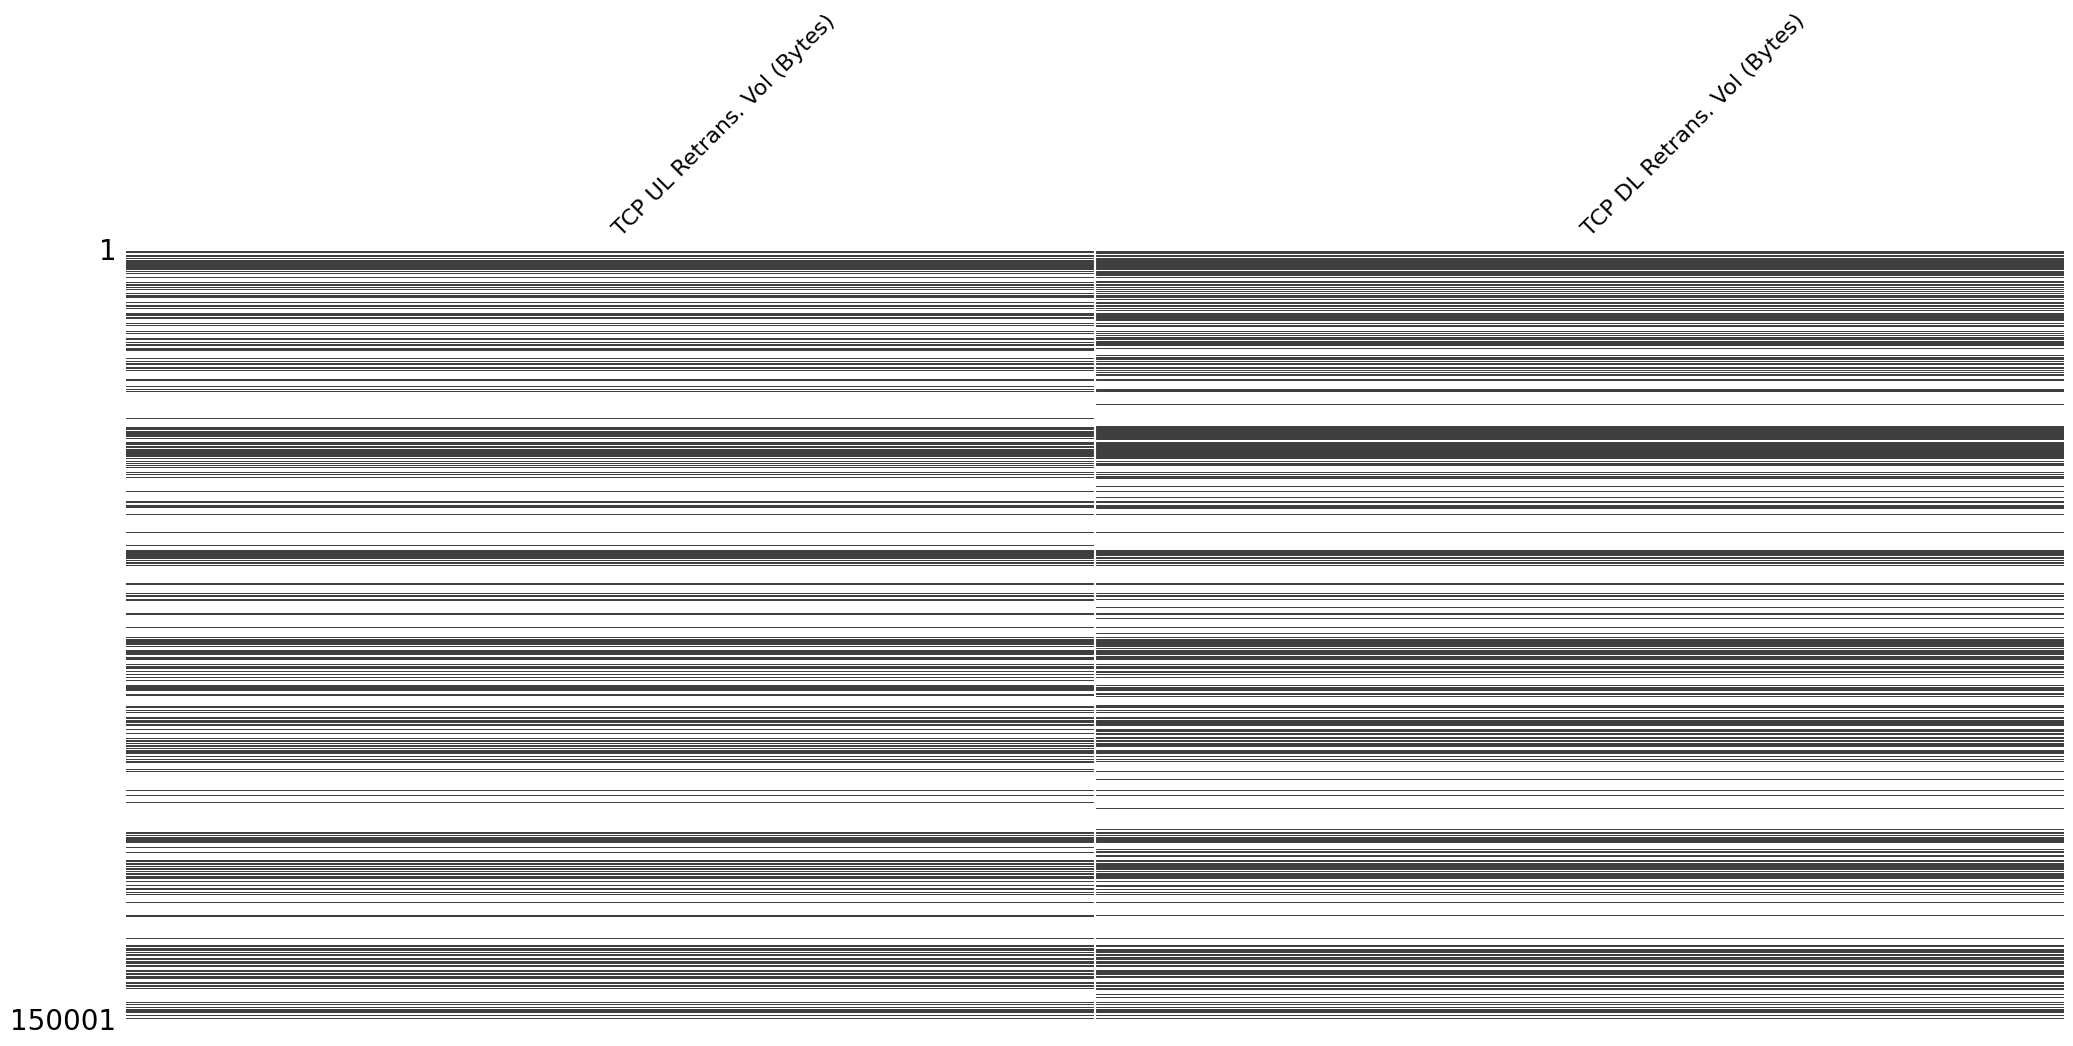

In [122]:
# Verificando a distribuição dos valores ausentes das colunas desejadas
ms.matrix(df[['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']], sparkline=False)

Conclusão : É possível a aplicação da técnica de preenchimento reverso pois os valores ausentes estão distribuidos

In [123]:
def preench_reverso(df,col):

    count = df[col].isna().sum()

    df[col] = df[col].fillna(method ='bfill')

    print(f"{count} Valores ausentes na coluna {col} foram substituídos usando o método de preenchimento reverso.")

In [124]:
# Imputando nas colunas desejadas
colunas_desejadas = ['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']

for col in tqdm(colunas_desejadas):

    preench_reverso(df,col)

    print(f" Valores Imputados na coluna {col} com sucesso!!!\n")

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 248.91it/s]

96649 Valores ausentes na coluna TCP UL Retrans. Vol (Bytes) foram substituídos usando o método de preenchimento reverso.
 Valores Imputados na coluna TCP UL Retrans. Vol (Bytes) com sucesso!!!

88146 Valores ausentes na coluna TCP DL Retrans. Vol (Bytes) foram substituídos usando o método de preenchimento reverso.
 Valores Imputados na coluna TCP DL Retrans. Vol (Bytes) com sucesso!!!



<Axes: >

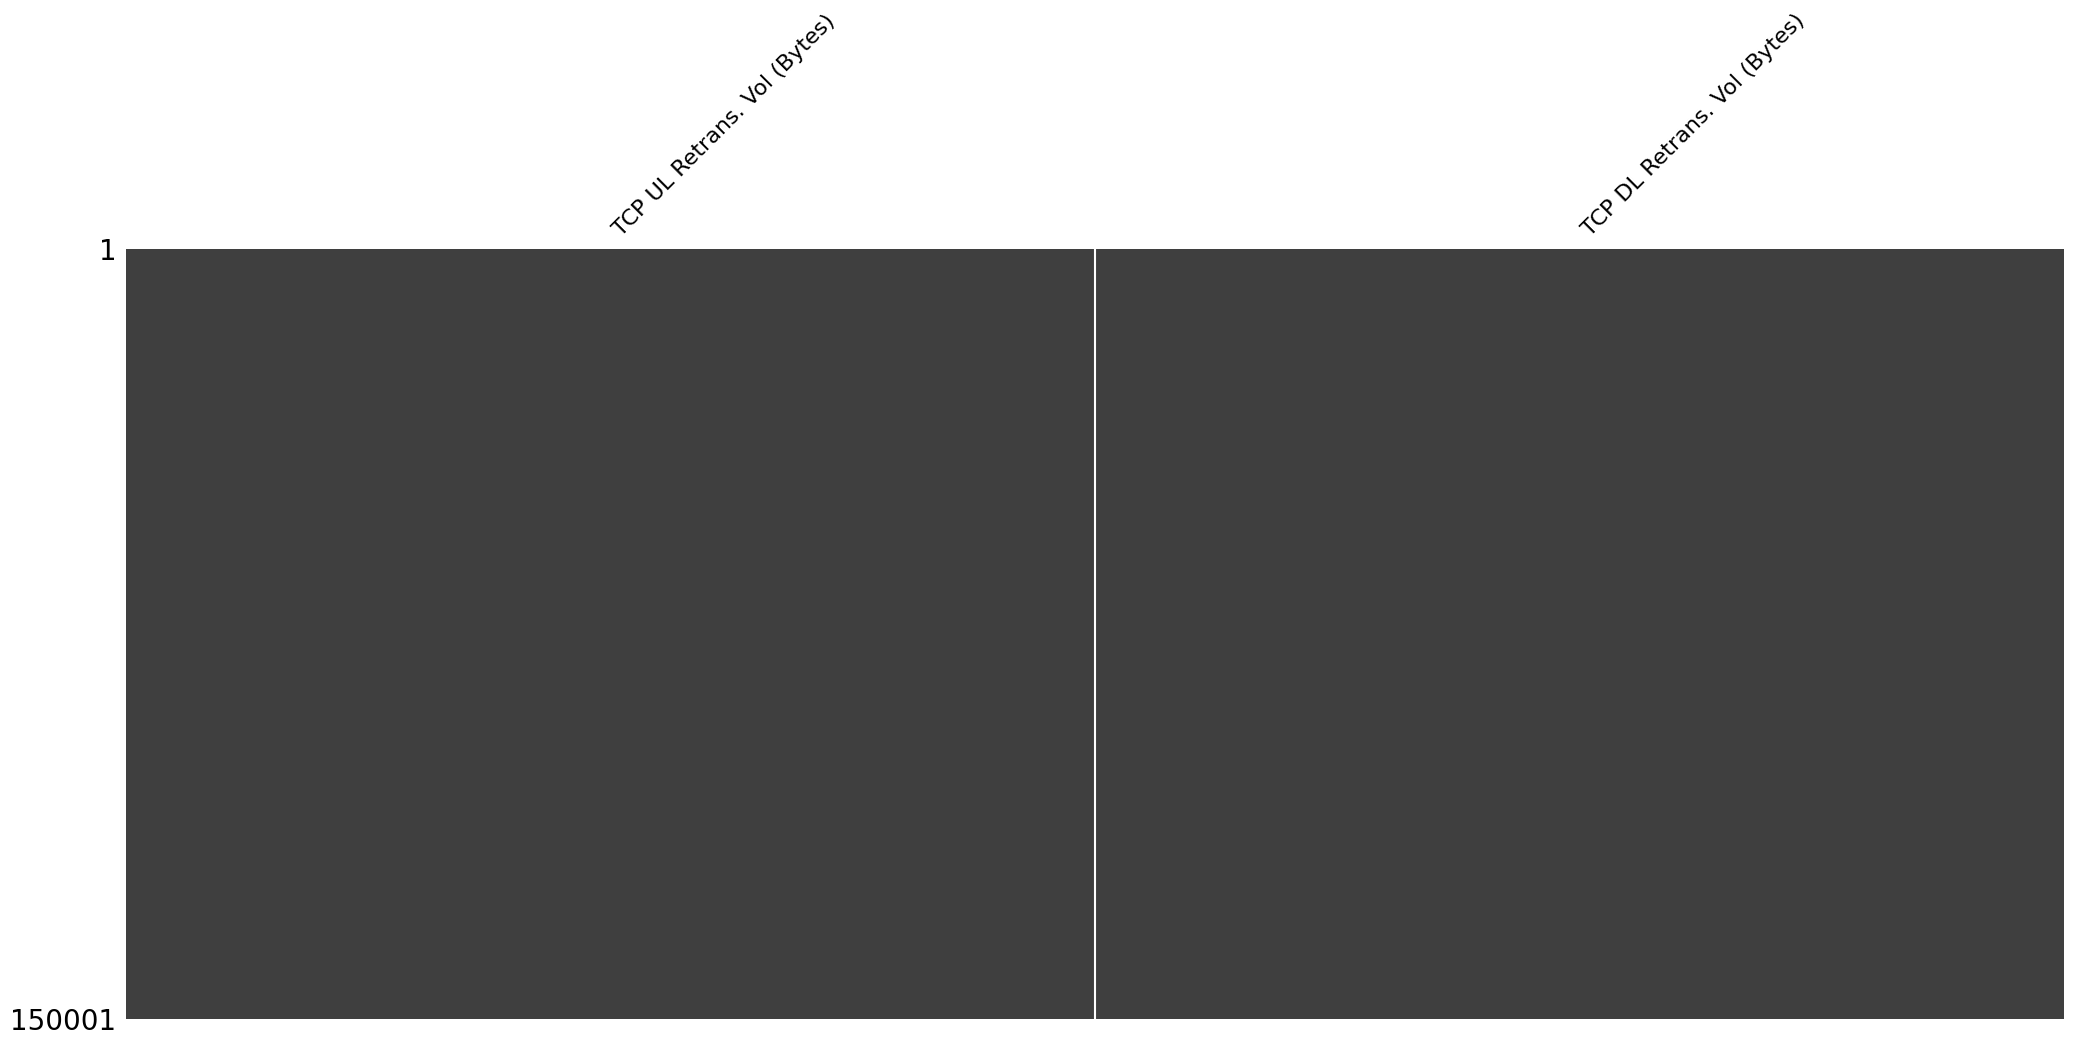

In [125]:
# Verificabndo se deu certo:
ms.matrix(df[['TCP UL Retrans. Vol (Bytes)','TCP DL Retrans. Vol (Bytes)']], sparkline=False)

In [126]:
# Verificando ausentes no dataframe
ausencia_total(df)
verifica_ausentes(df)

O dataset possui 0.98 % De valores ausentes.


,Qtd,%
Colunas,,
Avg RTT DL (ms),27829,18.55
Avg RTT UL (ms),27812,18.54
Last Location Name,1153,0.77
MSISDN/Number,1066,0.71
Bearer Id,991,0.66
50 Kbps < UL TP < 300 Kbps (%),792,0.53
10 Kbps < UL TP < 50 Kbps (%),792,0.53
UL TP > 300 Kbps (%),792,0.53
UL TP < 10 Kbps (%),792,0.53


### Técnica de preenchimento progressivo para as colunas 'TCP UL Retrans. Vol (Bytes)' e 'TCP DL Retrans. Vol (Bytes)'

<Axes: >

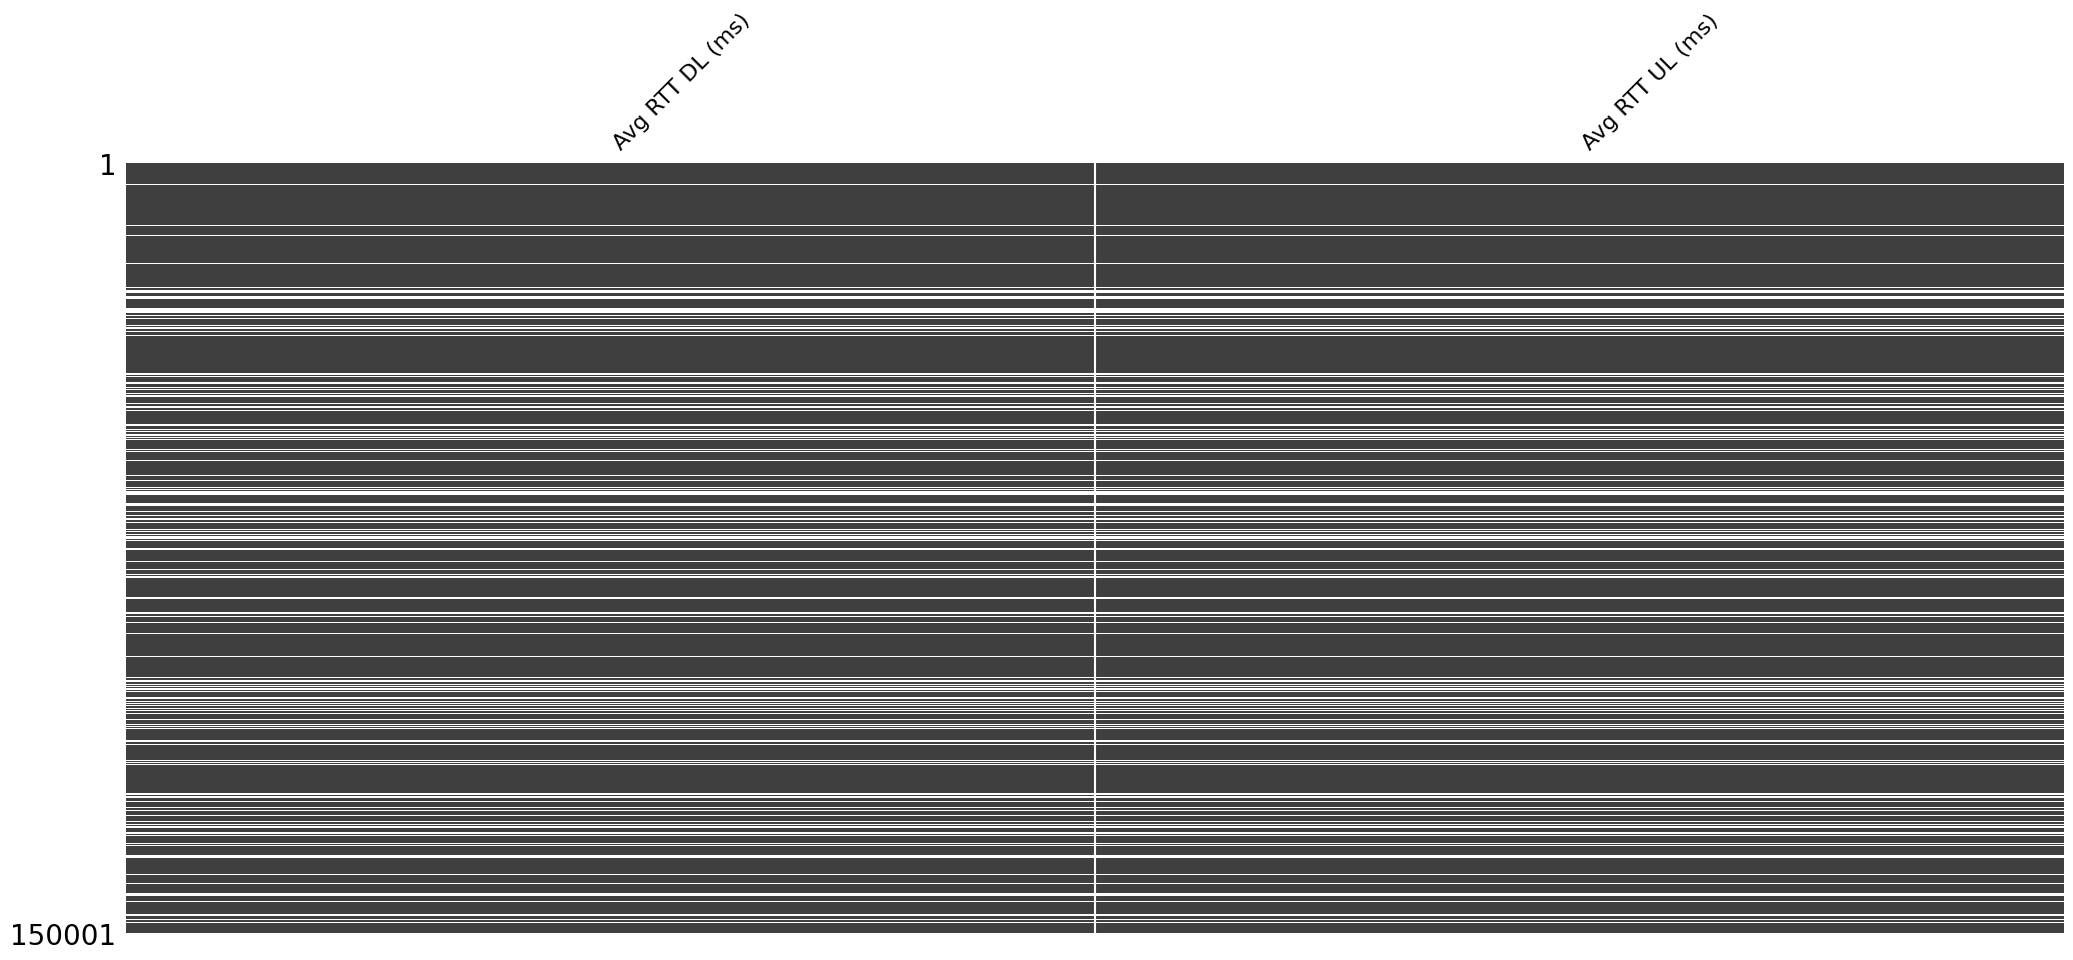

In [127]:
# Verificando a distribuição dos valores ausentes das colunas desejadas
ms.matrix(df[['Avg RTT DL (ms)','Avg RTT UL (ms)']], sparkline=False)

### Verificando se as variáveis de interesse possuem uma distribuição normal para preenchimento da média nos valores ausentes

In [128]:
# Variável Avg RTT DL (ms)

print(df['Avg RTT DL (ms)'].skew())

# Conclusão: Fortemente enviesada 

62.90782807995958


In [129]:
# Variável Avg RTT UL (ms)

print(df['Avg RTT UL (ms)'].skew())

# Conclusão: Fortemente enviesada 

28.457414585463823


In [130]:
# Não é possível a aplicação da média, vamos aplicar o preenchimento progressivo

def preench_progressivo(df,col):

    count = df[col].isna().sum()

    df[col] = df[col].fillna(method ='ffill')

    print(f"{count} Valores ausentes na coluna {col} foram substituídos usando o método de preenchimento progressivo.")

In [131]:
# Imputando nas colunas desejadas
colunas_desejadas = ['Avg RTT DL (ms)','Avg RTT UL (ms)']

for col in tqdm(colunas_desejadas):

    preench_progressivo(df,col)

    print(f" Valores Imputados na coluna {col} com sucesso!!!\n")

100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 211.83it/s]

27829 Valores ausentes na coluna Avg RTT DL (ms) foram substituídos usando o método de preenchimento progressivo.
 Valores Imputados na coluna Avg RTT DL (ms) com sucesso!!!

27812 Valores ausentes na coluna Avg RTT UL (ms) foram substituídos usando o método de preenchimento progressivo.
 Valores Imputados na coluna Avg RTT UL (ms) com sucesso!!!



<Axes: >

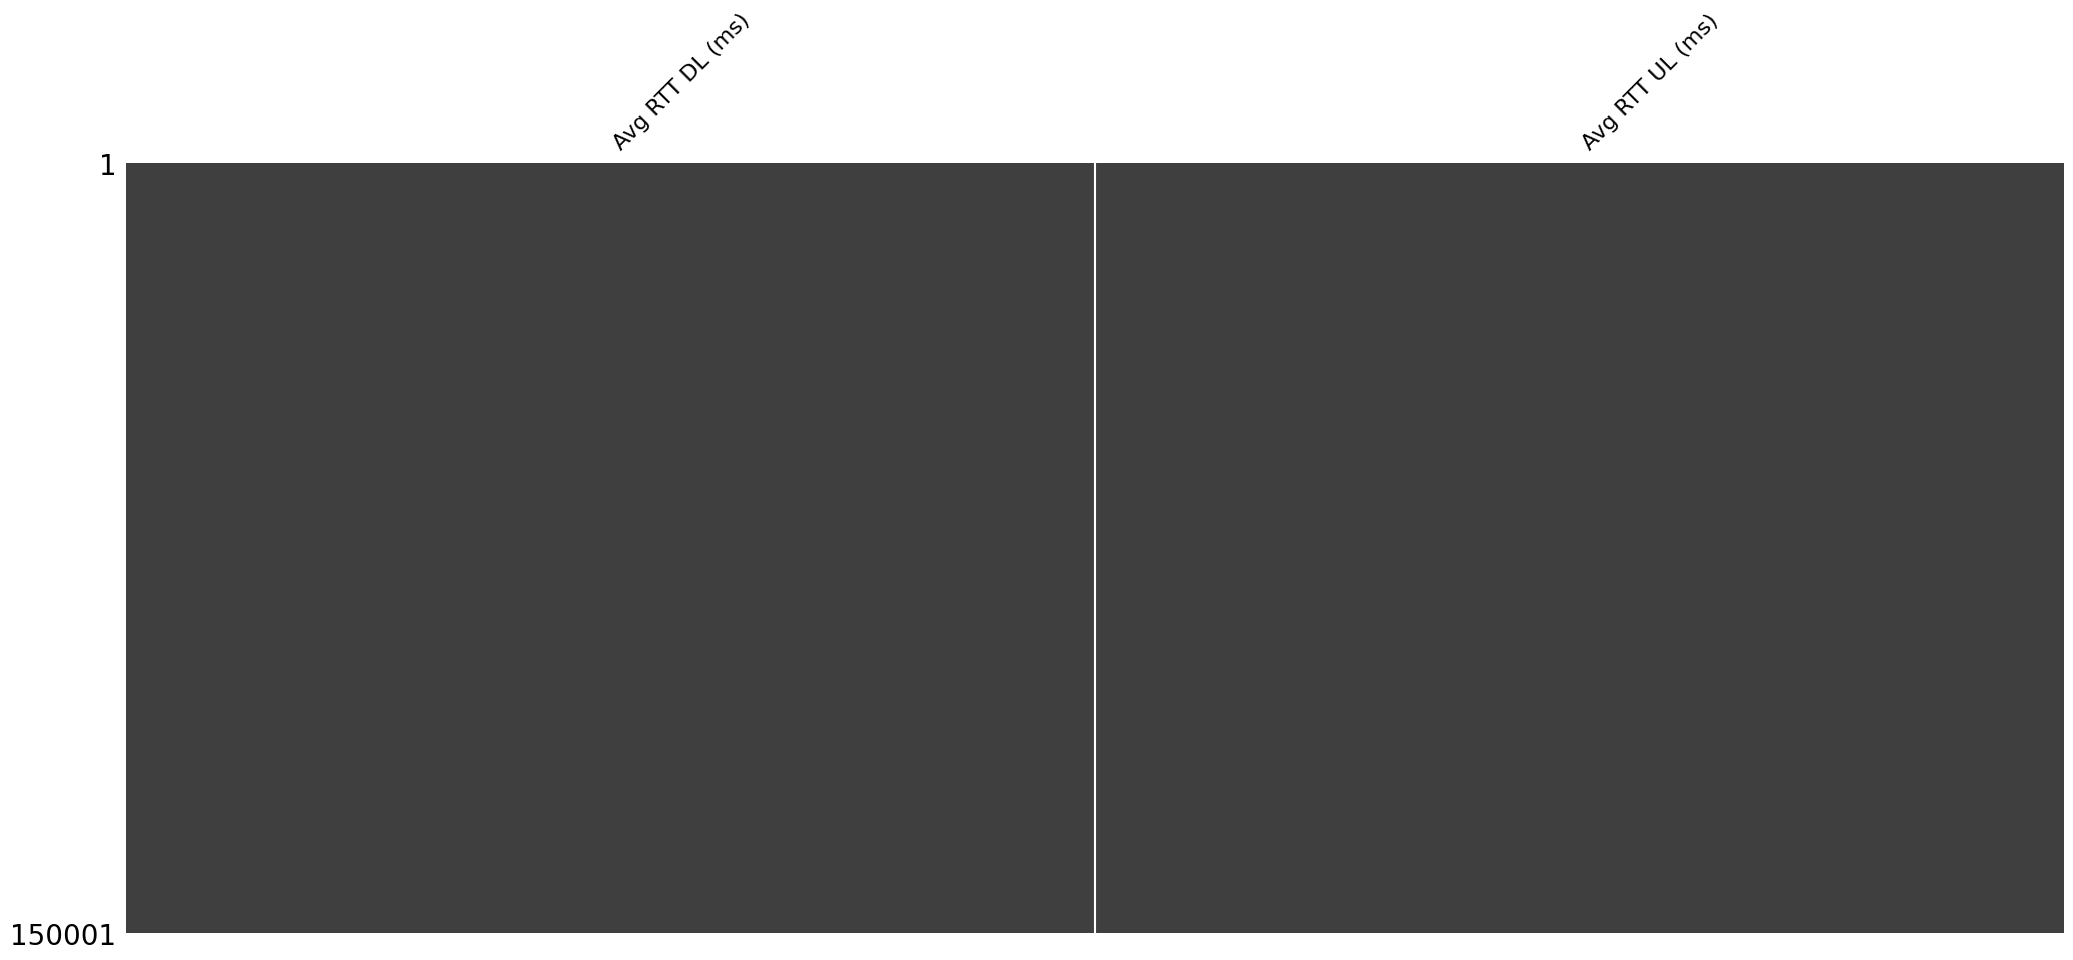

In [132]:
# Verificando se deu certo
ms.matrix(df[['Avg RTT DL (ms)','Avg RTT UL (ms)']], sparkline=False)

In [133]:
# Verificando ausentes no dataframe
ausencia_total(df)
verifica_ausentes(df)

O dataset possui 0.19 % De valores ausentes.


,Qtd,%
Colunas,,
Last Location Name,1153,0.77
MSISDN/Number,1066,0.71
Bearer Id,991,0.66
UL TP > 300 Kbps (%),792,0.53
UL TP < 10 Kbps (%),792,0.53
50 Kbps < UL TP < 300 Kbps (%),792,0.53
10 Kbps < UL TP < 50 Kbps (%),792,0.53
Nb of sec with Vol UL < 1250B,793,0.53
DL TP < 50 Kbps (%),754,0.50


### Tratamento das colunas Handset Manufacturer e Handset Type	

In [134]:
# Verificando o tipo de dados delas

df[['Handset Manufacturer','Handset Type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 2 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Handset Manufacturer  149429 non-null  object
 1   Handset Type          149429 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [135]:
#### Prenchimento com valores unknown para essas colunas

colunas_desejadas = ['Handset Manufacturer','Handset Type']

for col in tqdm(colunas_desejadas):

    count = df[col].isna().sum()

    df[col] = df[col].fillna('unknown')

    print(f" {count} Valores ausentes na coluna {col} preenchidas com sucesso!!!")

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 66.60it/s]

 572 Valores ausentes na coluna Handset Manufacturer preenchidas com sucesso!!!
 572 Valores ausentes na coluna Handset Type preenchidas com sucesso!!!


<Axes: >

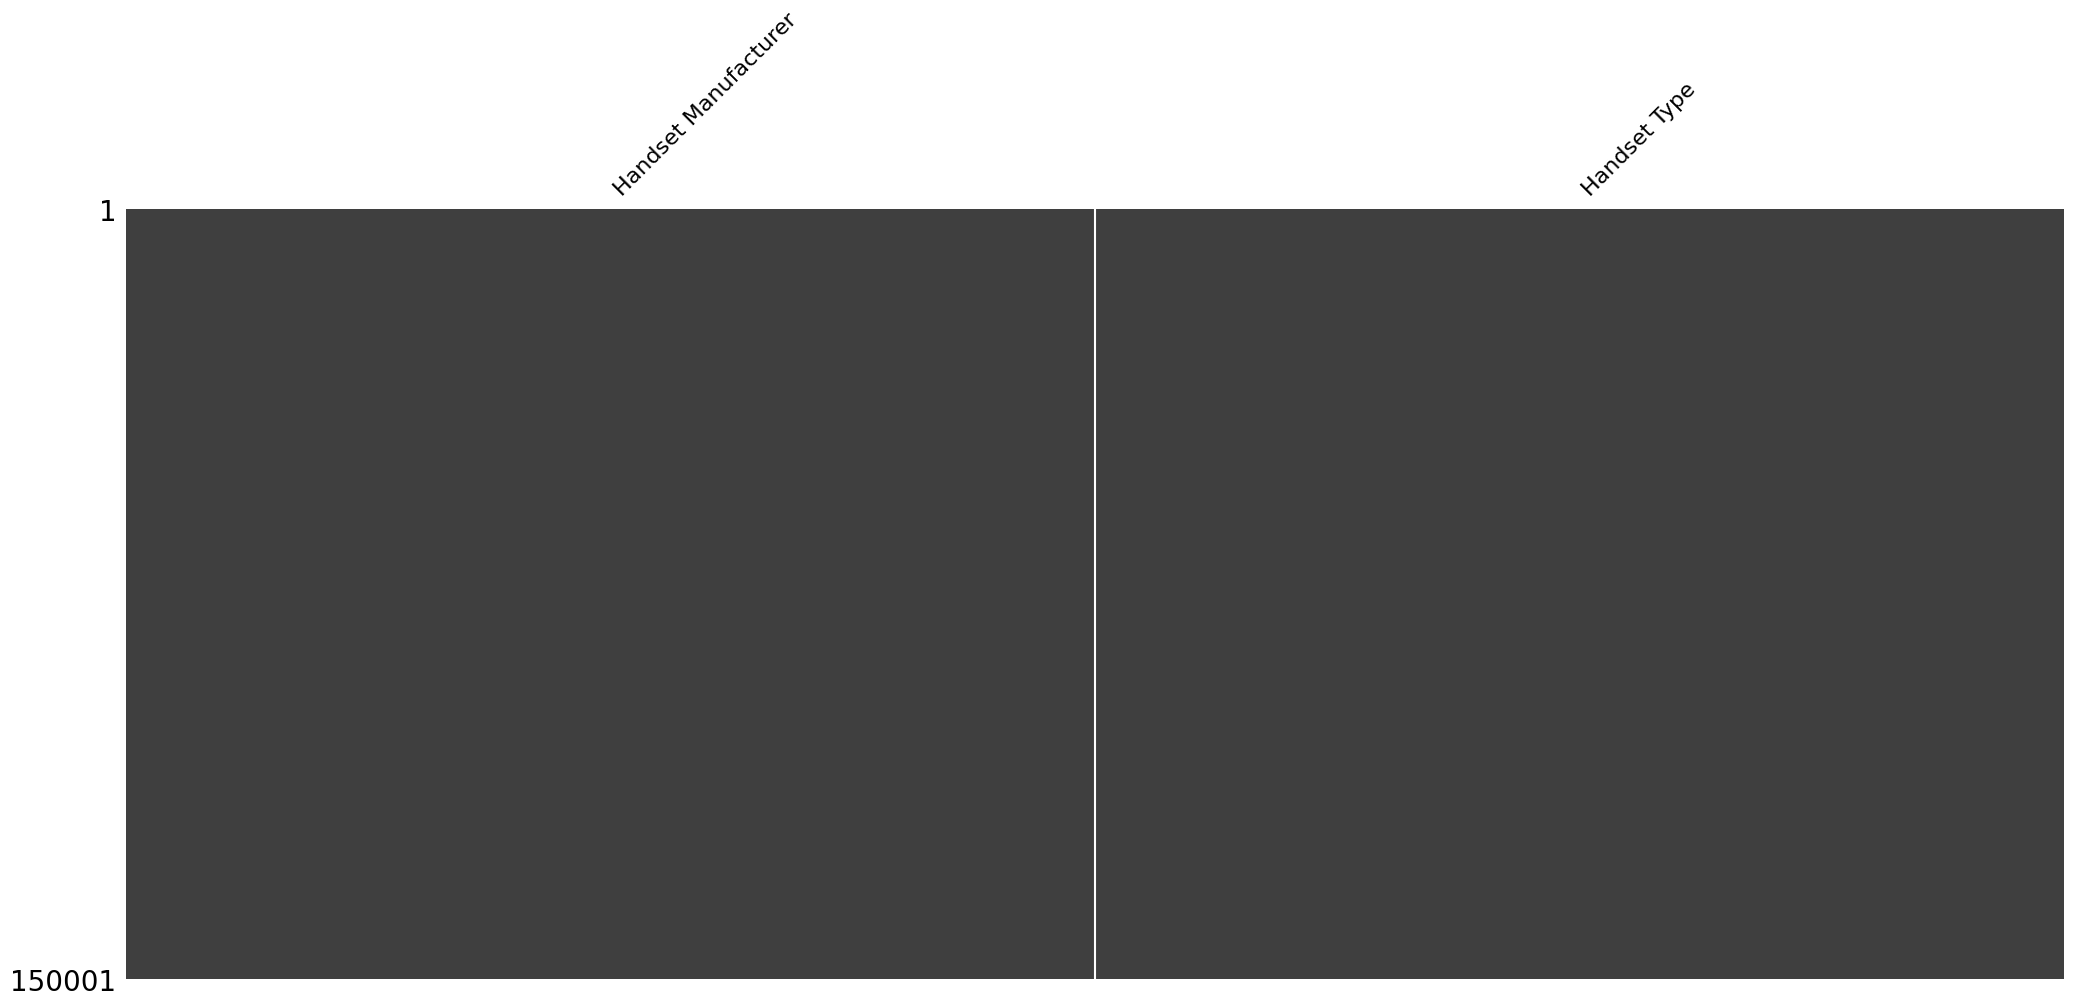

In [136]:
# Verificando se deu certo
ms.matrix(df[['Handset Manufacturer','Handset Type']], sparkline=False)

In [137]:
# Verificando ausentes no dataframe
ausencia_total(df)
verifica_ausentes(df)

O dataset possui 0.17 % De valores ausentes.


,Qtd,%
Colunas,,
Last Location Name,1153,0.77
MSISDN/Number,1066,0.71
Bearer Id,991,0.66
UL TP > 300 Kbps (%),792,0.53
UL TP < 10 Kbps (%),792,0.53
50 Kbps < UL TP < 300 Kbps (%),792,0.53
10 Kbps < UL TP < 50 Kbps (%),792,0.53
Nb of sec with Vol UL < 1250B,793,0.53
DL TP < 50 Kbps (%),754,0.50


### Drop de linhas para as demais colunas

In [141]:
def drop_linhas(df):

    antes = df.shape[0]

    df.dropna(inplace=True)

    depois = df.shape[0]

    linhas_removidas = depois - antes

    print(f" {linhas_removidas} Removidas do DataFrame")
    

In [142]:
drop_linhas(df)

 0 Removidas do DataFrame


<Axes: >

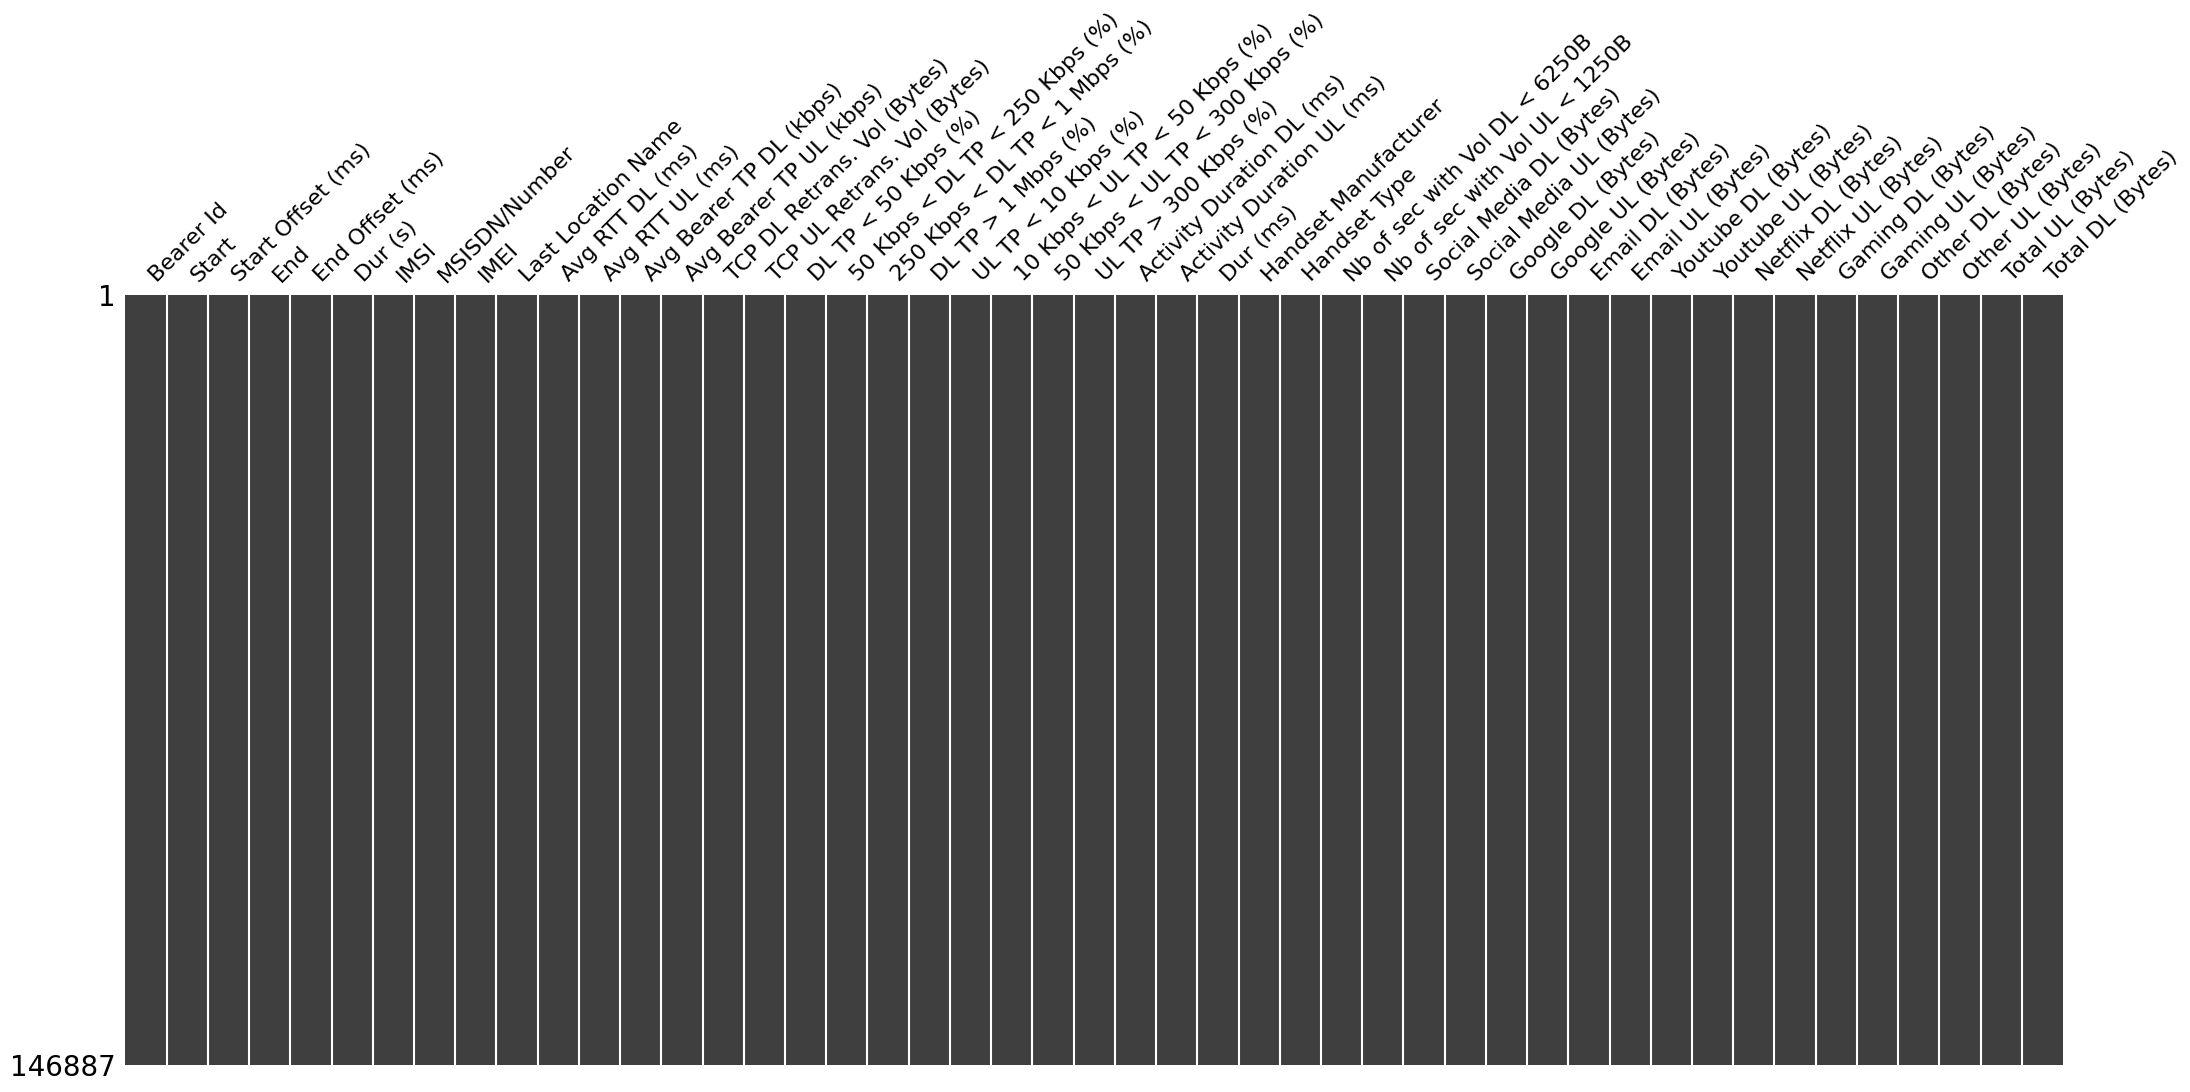

In [143]:
ms.matrix(df, sparkline=False)

In [144]:
ausencia_total(df)
verifica_ausentes(df)

O dataset possui 0.0 % De valores ausentes.


,Qtd,%
Colunas,,
Bearer Id,0,0.0
Start,0,0.0
Start Offset (ms),0,0.0
End,0,0.0
End Offset (ms),0,0.0
Dur (s),0,0.0
IMSI,0,0.0
MSISDN/Number,0,0.0
IMEI,0,0.0


Trabalho concluído com sucesso!!!

In [145]:
%watermark -a "Guilherme Silva"

Author: Guilherme Silva



In [146]:
%watermark --iversions

deep_translator: 1.11.4
numpy          : 2.3.2
matplotlib     : 3.10.3
pandas         : 2.3.1
missingno      : 0.5.2
tqdm           : 4.67.1
seaborn        : 0.13.2



In [147]:
# Gerando o arquivo de dependências
!pip freeze > requirements.txt
